In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,make_scorer
from sklearn.utils import resample
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from pandas_profiling import ProfileReport

import dill

%matplotlib inline

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### <span style="color:blue;font:Calibri">Importing our datasets. df_matches contains match data and df_balls contains ball-by-ball data.

In [0]:
df_matches = pd.read_csv('https://raw.githubusercontent.com/vinaybhardwaj1/iplanalysis/master/matches.csv',header=0)
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [0]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [0]:
df_balls = pd.read_csv('deliveries.csv',header=0)
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [0]:
df_balls.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [0]:
df_balls.shape

(179078, 21)

In [0]:
df_balls.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


#### <span style="color:blue">Fixing the datasets</span>

Our data has some discrepancies, like names of stadiums written in 2 different ways. We will be fixing this, this can be checked by doing value_counts on suspected columns.

In [0]:
df_matches['venue'][df_matches.venue == 'M. Chinnaswamy Stadium'] = 'M Chinnaswamy Stadium'
df_matches['city'][df_matches.city.isin(['Bangalore','Bengaluru'])] = 'Bangalore/Bengaluru'
df_matches['venue'][df_matches.venue == 'M. A. Chidambaram Stadium'] = 'MA Chidambaram Stadium, Chepauk'

filling null values with 'NA' in df_balls

In [0]:
df_balls['dismissal_kind'][df_balls['dismissal_kind'].isna()] = 'NA'
df_balls['player_dismissed'][df_balls['player_dismissed'].isna()] = 'NA'
df_balls['fielder'][df_balls['fielder'].isna()] = 'NA'
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NA,NA,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NA,NA,NA


## <span style="color:purple;font:Calibri">Creating new datasets from our provided ones</span>

We will be creating new datasets using df_matches and df_balls which will aggregate player_data and match data for analysis.

#### <span style="color:purple;font:Calibri">1. a. Player with most Man of the matches</span>

In [0]:
mom_data = df_matches.groupby('player_of_match',as_index=False)['id'].count().sort_values('id',ascending=False)
mom_data.head(10)

,player_of_match,id
35,CH Gayle,21
10,AB de Villiers,20
137,MS Dhoni,17
42,DA Warner,17
167,RG Sharma,17
222,YK Pathan,16
201,SR Watson,15
191,SK Raina,14
56,G Gambhir,13
123,MEK Hussey,12


#### <span style="color:purple;font:Calibri">1. b. Dataframe containing batsman data</span>

In [0]:
player_runs = df_balls.groupby('batsman',as_index=False)['batsman_runs'].sum()
player_runs.sort_values(by=['batsman_runs'],ascending=False,inplace=True)
player_matches = df_balls.groupby('batsman',as_index=False).agg({'match_id': pd.Series.nunique})
player_matches.sort_values(by=['match_id'],ascending=False,inplace=True)
player_matches.head()

,batsman,match_id
428,SK Raina,189
367,RG Sharma,182
384,RV Uthappa,170
290,MS Dhoni,170
486,V Kohli,169


In [0]:
player_data = player_runs.merge(player_matches,on=['batsman'])
player_data.rename(columns={'match_id':'matches'},inplace=True)
#mom_data.rename(columns={'player_of_match':'batsman','id':'MOM Wins'},inplace=True)
player_data = player_data.merge(mom_data.rename(columns={'player_of_match':'batsman','id':'MOM Wins'}),on=['batsman'])
player_data['average'] = player_data.batsman_runs/player_data.matches
player_data.sort_values(by=['batsman_runs'],inplace=True,ascending=False)
player_data.head(10)

,batsman,batsman_runs,matches,MOM Wins,average
0,V Kohli,5434,169,12,32.153846
1,SK Raina,5415,189,14,28.650794
2,RG Sharma,4914,182,17,27.000000
3,DA Warner,4741,126,17,37.626984
4,S Dhawan,4632,158,6,29.316456
5,CH Gayle,4560,124,21,36.774194
6,MS Dhoni,4477,170,17,26.335294
7,RV Uthappa,4446,170,7,26.152941
8,AB de Villiers,4428,142,20,31.183099
9,G Gambhir,4223,151,13,27.966887


In [0]:
batsman_balls = df_balls[df_balls.wide_runs == 0].groupby('batsman',as_index=False)['ball'].count()
batsman_balls.rename(columns={'ball':'balls_faced'},inplace=True)
player_data = player_data.merge(batsman_balls,on=['batsman'])
player_data['strk_rate'] = 100*(player_data['batsman_runs']/player_data['balls_faced'])
player_data.head()

,batsman,batsman_runs,matches,MOM Wins,average,balls_faced,strk_rate
0,V Kohli,5434,169,12,32.153846,4114,132.085561
1,SK Raina,5415,189,14,28.650794,3917,138.243554
2,RG Sharma,4914,182,17,27.000000,3744,131.250000
3,DA Warner,4741,126,17,37.626984,3306,143.405929
4,S Dhawan,4632,158,6,29.316456,3671,126.178153


In [0]:
player_data.head()

,batsman,batsman_runs,matches,MOM Wins,average,balls_faced,strk_rate
0,V Kohli,5434,169,12,32.153846,4114,132.085561
1,SK Raina,5415,189,14,28.650794,3917,138.243554
2,RG Sharma,4914,182,17,27.000000,3744,131.250000
3,DA Warner,4741,126,17,37.626984,3306,143.405929
4,S Dhawan,4632,158,6,29.316456,3671,126.178153


#### <span style="color:purple;font:Calibri">1. c. Dataframe containing bowler data</span>

In [0]:
player_wickets = df_balls[(df_balls.player_dismissed.notna()) & 
                          (~df_balls['dismissal_kind'].isin(
                              ['NA','run out', 'retired hurt', 'obstructing the field']))].groupby('bowler',as_index=False)['player_dismissed'].count()
player_matches = df_balls.groupby('bowler',as_index=False).agg({'match_id': pd.Series.nunique})
player_wickets = player_wickets.merge(player_matches.rename(columns={'match_id':'matches'}),on='bowler')
df_balls['bowler_runs_conceded'] = df_balls.wide_runs + df_balls.noball_runs + df_balls.penalty_runs + df_balls.batsman_runs
player_runs = df_balls.groupby('bowler',as_index=False)['bowler_runs_conceded'].sum()
bowler_data = player_wickets.merge(player_runs[['bowler','bowler_runs_conceded']],on='bowler')
bowler_data['average'] = bowler_data.bowler_runs_conceded/bowler_data.player_dismissed
bowler_data = bowler_data.merge(mom_data.rename(columns={'player_of_match':'bowler','id':'MOM Wins'}),on=['bowler'])
bowler_data.rename(columns={'player_dismissed':'wickets_taken'},inplace=True)
top_10_bowlers = bowler_data.sort_values(by='wickets_taken',ascending=False).head(10)
top_10_bowlers

,bowler,wickets_taken,matches,bowler_runs_conceded,average,MOM Wins
137,SL Malinga,170,122,3395,19.970588,6
3,A Mishra,156,147,3804,24.384615,11
50,Harbhajan Singh,150,157,3979,26.526667,8
111,PP Chawla,149,156,4086,27.422819,3
35,DJ Bravo,147,131,3662,24.911565,3
20,B Kumar,133,117,3185,23.947368,5
114,R Ashwin,125,136,3337,26.696000,2
139,SP Narine,122,109,2884,23.639344,9
150,UT Yadav,119,118,3550,29.831933,8
119,RA Jadeja,108,142,3176,29.407407,8


In [0]:
bowler_balls = df_balls[(df_balls.wide_runs == 0) & (df_balls.noball_runs == 0)].groupby('bowler',as_index=False)['ball'].count()
bowler_balls.rename(columns={'ball':'balls_bowled'},inplace=True)
bowler_data = bowler_data.merge(bowler_balls,on=['bowler'])
bowler_data['bowler_strk_rate'] = (bowler_data['balls_bowled']/bowler_data['wickets_taken'])
bowler_data.head()

,bowler,wickets_taken,matches,bowler_runs_conceded,average,MOM Wins,balls_bowled,bowler_strk_rate
0,A Chandila,11,12,242,22.000000,1,234,21.272727
1,A Joseph,6,3,92,15.333333,1,52,8.666667
2,A Kumble,45,42,1058,23.511111,3,965,21.444444
3,A Mishra,156,147,3804,24.384615,11,3102,19.884615
4,A Nehra,106,88,2495,23.537736,6,1908,18.000000


#### <span style="color:purple;font:Calibri">1. d. Fetching all player names and team names for categorical features encoding</span>

In [0]:
allplayers = list(df_balls['batsman'].unique()) + list(df_balls['bowler'].unique()) + list(df_balls['non_striker'].unique())
allplayers_unique = set(allplayers)

allteams = list(df_balls['batting_team'].unique()) + list(df_balls['bowling_team'].unique())
allteams_unique = set(allteams)


### <span style="color:orange;font:Calibri">Some analysis on above created datasets</span>

##### <span style="color:orange;font:Calibri">Team winning batting 1st or 2nd? in each ground</span>

In [0]:
field_win = df_matches[df_matches['win_by_runs'] == 0].groupby(['city','venue'],as_index=False)['id'].count()
field_win.rename(columns={'id':'Fielding First Win Count'},inplace=True)
bat_win = df_matches[df_matches['win_by_runs'] > 0].groupby(['city','venue'],as_index=False)['id'].count()
bat_win.rename(columns={'id':'Batting First Win Count'},inplace=True)
ground_win = field_win.set_index(['city','venue']).join(bat_win.set_index(['city','venue']))
ground_win['Diff'] = ground_win['Batting First Win Count'] - ground_win['Fielding First Win Count']
ground_win.sort_values(by='Diff',ascending=False).fillna(0).head()

,,Fielding First Win Count,Batting First Win Count,Diff
city,venue,,,
Chennai,"MA Chidambaram Stadium, Chepauk",23,34.0,11.0
Pune,Subrata Roy Sahara Stadium,6,11.0,5.0
Durban,Kingsmead,6,9.0,3.0
Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,4,7.0,3.0
Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,3,5.0,2.0


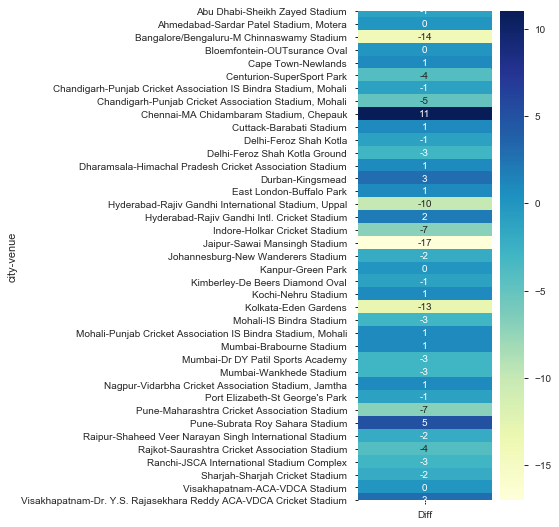

In [0]:
plotter=ground_win.reset_index()
plotter = plotter[['city','venue','Diff']].fillna(0)
plotter.set_index(['city','venue'],inplace=True)
plt.figure(figsize=(3,9))
sns.heatmap(plotter,annot=True,cmap="YlGnBu")
plt.show()

We can see teams batting first win in Chennai and Pune but teams batting second win in Kolkata, Jaipur, and Bangalore

##### <span style="color:orange;font:Calibri">Team favouring ground</span>

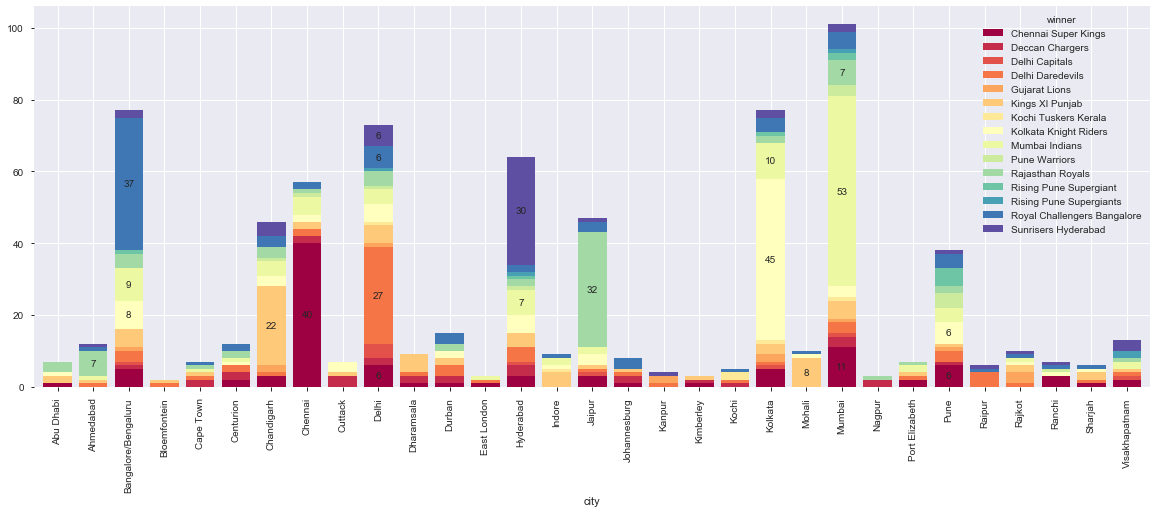

In [0]:
ground_winner = df_matches.groupby(['city','winner'])['id'].count().unstack('winner').fillna(0)
cmap = cm.get_cmap('Spectral')
ax = ground_winner.plot(kind='bar',stacked=True,figsize=(20,7),width=0.8,colormap=cmap)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height>5:
        ax.text(x+width/2, 
            y+height/2, 
            int(height), 
            horizontalalignment='center', 
            verticalalignment='center')

All the teams are favoring thier homegrounds, There is a near equal fight in Pune. 

##### <span style="color:orange;font:Calibri">Top 10 batsman and bowlers</span>

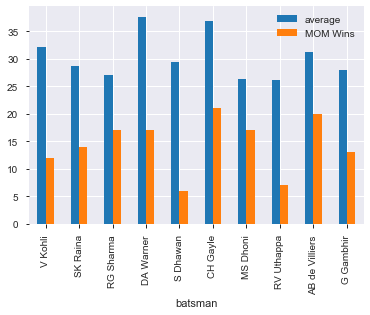

In [0]:
top_10_batsman = player_data.head(10).set_index('batsman')
ax = top_10_batsman[['average','MOM Wins']].plot.bar()

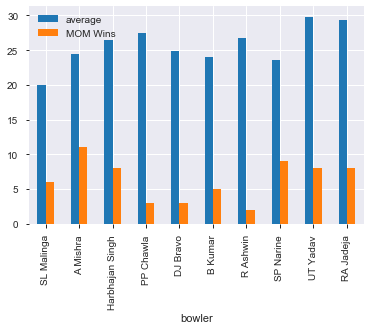

In [0]:
ax = top_10_bowlers.set_index('bowler')[['average','MOM Wins']].plot.bar()

## <span style="color:brown;font:Calibri">Creating enhanced df_balls dataframe which also contains <b>match situation</b> data for each ball - some feature engineering</span> 


##### <span style="color:brown;font:Calibri">We need to add some columns like - Bowler data, Batsman data, Wickets Fallen, Score, Last Wicket Fallen Over, Average Total at venue </span>

This task will be done using utility file which contains functions for readng match data and create situational columns. As this requires reading dataframe's previous rows we need to save and re-use this file.

In [0]:
# from ipl_utils import createBallsExtended
# df_balls = createBallsExtended(df_balls)

# # Saving the hard work
# export_balls = df_balls.to_csv('df_balls.csv', index = None, header=True)

The above step has been already executed and new file has been provided, importing the file in below step

In [2]:
df_balls = pd.read_csv('https://raw.githubusercontent.com/vinaybhardwaj1/iplanalysis/master/df_balls.csv',header=0)
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,bowler_runs_conceded,wickets_fallen,score,last_wicket_ball,striker_runs,non_striker_runs,bowler_match_runs,bowler_match_wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,4,0,4,0.0,4,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,4,0.0,4,0,4,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2,0,6,0.0,4,0,6,0


In [0]:
# profile = ProfileReport(df_balls, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile

In [0]:
df_balls['dismissal_kind'][df_balls['dismissal_kind'].isna()] = 'NA'
df_balls['player_dismissed'][df_balls['player_dismissed'].isna()] = 'NA'
df_balls['fielder'][df_balls['fielder'].isna()] = 'NA'

## Predictions

## Predicting the score of each match

In [4]:
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,bowler_runs_conceded,wickets_fallen,score,last_wicket_ball,striker_runs,non_striker_runs,bowler_match_runs,bowler_match_wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0.0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0,0.0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,4,0,4,0.0,4,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,4,0.0,4,0,4,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,2,0,6,0.0,4,0,6,0


In [0]:
bat_first_data = df_balls[df_balls['inning'] == 1]
bat_scnd_data = df_balls[df_balls['inning'] == 1]
df_total_score = bat_first_data.groupby(
    ['match_id','batting_team', 'bowling_team'],
    as_index=False)['total_runs'].sum()
df_total_score = df_total_score.merge(bat_first_data,on=['match_id','batting_team', 'bowling_team'])
#[['bowler_match_runs','striker_runs','over','score','bowler_match_wickets','last_wicket_ball','wickets_fallen']].values

In [6]:
df_total_score.rename(columns ={'total_runs_x':'total_score'},inplace=True)
df_total_score = df_total_score.drop(['player_dismissed','fielder','dismissal_kind','match_id'], axis=1)
df_total_score.columns

Index(['batting_team', 'bowling_team', 'total_score', 'inning', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'bowler_runs_conceded',
       'wickets_fallen', 'score', 'last_wicket_ball', 'striker_runs',
       'non_striker_runs', 'bowler_match_runs', 'bowler_match_wickets'],
      dtype='object')

In [0]:
allplayers = list(df_balls['batsman'].unique()) + list(df_balls['bowler'].unique()) + list(df_balls['non_striker'].unique())
allplayers_unique = set(allplayers)

allteams = list(df_balls['batting_team'].unique()) + list(df_balls['bowling_team'].unique())
allteams_unique = set(allteams)

In [8]:
team_label_encoder = preprocessing.LabelEncoder()
player_label_encoder = preprocessing.LabelEncoder()

team_cols = ['batting_team', 'bowling_team']
team_label_encoder.fit(pd.DataFrame(allteams_unique))
for t in team_cols:
    df_total_score[t] = team_label_encoder.transform(df_total_score[t])

player_cols = ['batsman', 'non_striker', 'bowler']
player_label_encoder.fit(pd.DataFrame(allplayers_unique))
for p in player_cols:
    df_total_score[p] = player_label_encoder.transform(df_total_score[p])

df_total_score.head()

,batting_team,bowling_team,total_score,inning,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,bowler_runs_conceded,wickets_fallen,score,last_wicket_ball,striker_runs,non_striker_runs,bowler_match_runs,bowler_match_wickets
0,14,13,207,1,1,1,121,423,520,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,14,13,207,1,1,2,121,423,520,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
2,14,13,207,1,1,3,121,423,520,0,0,0,0,0,0,4,0,4,4,0,4,0.0,4,0,4,0
3,14,13,207,1,1,4,121,423,520,0,0,0,0,0,0,0,0,0,0,0,4,0.0,4,0,4,0
4,14,13,207,1,1,5,121,423,520,0,2,0,0,0,0,0,2,2,2,0,6,0.0,4,0,6,0


Text(0, 0.5, 'Feature Importance')

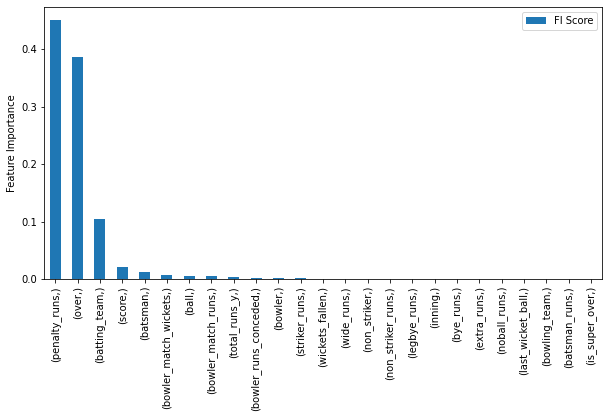

In [0]:
y = df_total_score['total_score'].values
X = df_total_score.loc[:, df_total_score.columns != 'total_score'].values
RF = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=0)
RF = RF.fit(X,y)
FI_df = pd.DataFrame(RF.feature_importances_, index=[df_total_score.columns.difference(['total_score'])],columns =['FI Score'])
FI_df.sort_values('FI Score', inplace=True, ascending = False)
%matplotlib inline
pl = FI_df.plot.bar(figsize=(10,5))
pl.set_ylabel("Feature Importance")

In [0]:
df_total_score_pre = df_total_score[['ball','batsman_runs','bowling_team','batsman','bowler_runs_conceded',
                                 'over','score','bowler_match_wickets','bowler_match_runs','bowler','penalty_runs','total_runs_y','total_score']]
df_total_score_pre.head(10)

,ball,batsman_runs,bowling_team,batsman,bowler_runs_conceded,over,score,bowler_match_wickets,bowler_match_runs,bowler,penalty_runs,total_runs_y,total_score
0,1,0,13,121,0,1,0,0,0,520,0,0,207
1,2,0,13,121,0,1,0,0,0,520,0,0,207
2,3,4,13,121,4,1,4,0,4,520,0,4,207
3,4,0,13,121,0,1,4,0,4,520,0,0,207
4,5,0,13,121,2,1,6,0,6,520,0,2,207
5,6,0,13,423,0,1,6,0,6,520,0,0,207
6,7,0,13,423,0,1,7,0,6,520,0,1,207
7,1,1,13,423,1,2,8,0,1,3,0,1,207
8,2,4,13,121,4,2,12,0,5,3,0,4,207
9,3,0,13,121,1,2,13,0,6,3,0,1,207


Building model and checking accuracy on train set.

In [9]:
y = df_total_score['total_score'].values
X = df_total_score.loc[:, df_total_score.columns != 'total_score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin = RandomForestRegressor(n_estimators=100,max_features=None)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

y_pred = lin.fit(X_train_scaled,y_train).predict(X_train_scaled)

def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

custom_accuracy(y_train,y_pred,10)

98.11976871133396

Text(0, 0.5, 'Feature Importance')

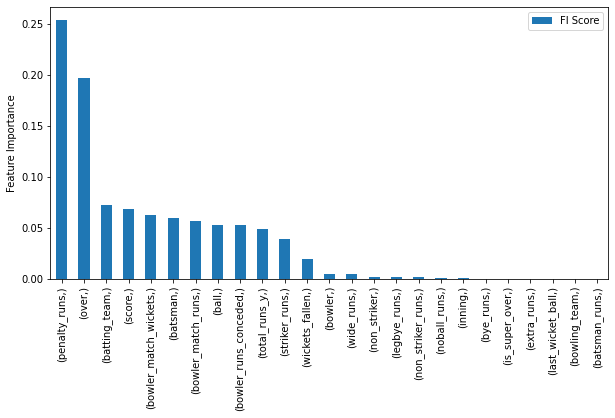

In [10]:
FI_df = pd.DataFrame(lin.feature_importances_, index=[df_total_score.columns.difference(['total_score'])],columns =['FI Score'])
FI_df.sort_values('FI Score', inplace=True, ascending = False)
%matplotlib inline
pl = FI_df.plot.bar(figsize=(10,5))
pl.set_ylabel("Feature Importance")

Accuracy on test set

In [11]:
X_test_scaled = scaler.transform(X_test)
y_pred = lin.predict(X_test_scaled)
custom_accuracy(y_test,y_pred,10)

86.28497493126314

In [12]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp.head(10)

,Actual,Predicted
0,185,182.65
1,170,170.32
2,176,178.98
3,263,215.21
4,156,163.23
5,165,163.85
6,128,131.49
7,157,156.85
8,174,168.18
9,161,177.35


We have recieved an accuracy of 86% on test set for predicting the score of T20 match within the range of 10 runs. But also we can see the predictions go off range for outlier values of extremely high scores or extremely low scores, which increases the value of our prdictions.
